## 第2章，knn

In [2]:
import numpy as np
from sklearn.metrics import accuracy_score # 计算accuracy
y_true = [1, 1, 0, 1, 0]
y_pred = [1, 1, 1, 0, 0]
score = accuracy_score(y_true, y_pred)
score

0.6

In [16]:
import numpy as np
import operator

def _distance(x,y):
    return (np.sum((x-y)**2))**(1/2) # 采用欧式距离

def knn(dataSet,labels,k):
    # dataSet，labels是np.array
    def model(x):
        dist_list = []
        for e in dataSet:
            dist_list += [_distance(e,x)] # 计算每个点与x的距离
        argmin_distance = np.array(dist_list).argsort() # 按照距离排序获得下标
        kl = labels[argmin_distance[:k]]

        classCount = {}
        for i in range(k):
            classCount[kl[i]] = classCount.get(kl[i],0)+1 # 字典赋值用法
        sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)
        # sorted,key=operator.itemgetter(1)
        return sortedClassCount[0][0]
    return model

def KNN(dataSet,labels,k):
    # 矩阵写法
    def model(x):
        dataSetSize = dataSet.shape[0]
        d = []
        for a in dataSet:
            d.append(a.tolist())
        d = np.array(d)
        diffMat = np.tile(x, (d.shape[0], 1)) - d
        sqDiffMat = diffMat ** 2
        sqDistances = sqDiffMat.sum(axis=1)
        distances = sqDistances ** 0.5
        sortedDistIndicies = distances.argsort()
        classCount = {}
        for i in range(k):
            voteIlabel = labels[sortedDistIndicies[i]]
            classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
        sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
        return sortedClassCount[0][0]
    return model



a = np.array([[1.,1.1],[0.,0.],[1.,0.],[0,1]])
l = np.array(['e','e','c','c'])
b = np.array([1,1.])
print(knn(dataSet=a,labels=l,k=3)(x=b))


c


In [17]:

def catlines(filename,n=None):
    with open(filename,'r') as f:
        for lines in f:
            print(lines,end='')

def file2matrix(filename):
    love_dictionary={'largeDoses':3, 'smallDoses':2, 'didntLike':1}
    fr = open(filename)
    arrayOLines = fr.readlines()
    numberOfLines = len(arrayOLines)            #get the number of lines in the file
    returnMat = np.zeros((numberOfLines, 3))  # prepare matrix to return
    classLabelVector = []  # prepare labels return
    index = 0
    for line in arrayOLines:
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index] = listFromLine[0:3]
        if listFromLine[-1].isdigit():
            classLabelVector.append(listFromLine[-1])
        else:
            classLabelVector.append(love_dictionary.get(listFromLine[-1]))
        index += 1
    classLabelVector = np.array(classLabelVector)
    return returnMat,classLabelVector




filename = './datingTestSet2.txt'
M,L = file2matrix(filename)
print(M)

[[4.0920000e+04 8.3269760e+00 9.5395200e-01]
 [1.4488000e+04 7.1534690e+00 1.6739040e+00]
 [2.6052000e+04 1.4418710e+00 8.0512400e-01]
 ...
 [2.6575000e+04 1.0650102e+01 8.6662700e-01]
 [4.8111000e+04 9.1345280e+00 7.2804500e-01]
 [4.3757000e+04 7.8826010e+00 1.3324460e+00]]


/home/zexingxie/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


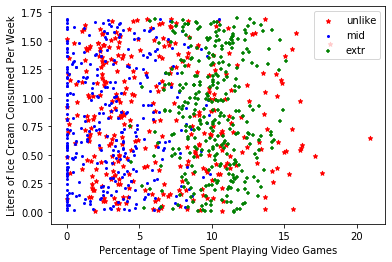

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
plt.xlabel('Percentage of Time Spent Playing Video Games')
plt.ylabel('Liters of Ice Cream Consumed Per Week')
ax = fig.add_subplot(111)
# ax.axis([-2,25,-0.2,2.0])
import numpy as np
L = np.array(L).astype(int)
idx_1 = np.where(L==1)
p1 =  ax.scatter(M[idx_1,1],M[idx_1,2],marker = '*',color = 'r',label='unlike',s=20)
idx_2 = np.where(L==2)
p2 =  ax.scatter(M[idx_2,1],M[idx_2,2],marker = 'o',color ='b',label='mid',s=4)
idx_3 = np.where(L==3)
p3 =  ax.scatter(M[idx_3,1],M[idx_3,2],marker = '+',color ='g',label='extr',s=20)
plt.legend(loc = 'upper right')
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
a = zip(M,L)
trainP, testP = train_test_split(list(a), test_size=0.2,random_state=1,shuffle=False)
predictionL = []
trainP = np.array(trainP)
testP = np.array(testP)
for e in range(3,20):
    predictionL = []
    model = KNN(dataSet=trainP[:,0],labels=trainP[:,1],k=e)
    for i,x in enumerate(testP[:,0]):
        predictionL.append(model(x))
    # accurate_1 = accuracy_score(y_true=testP[:,1],y_pred=predictionL)
    print(np.sum(testP[:,1]==predictionL)/len(predictionL))
   

0.83
0.82
0.835
0.835
0.84
0.835
0.84
0.855
0.865
0.865
0.865
0.865
0.85
0.87
0.865
0.87
0.88


sklearn实现

In [71]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score
k = KNN(n_neighbors=3)
cross_val_score(k,M,L,cv=10).mean()
a = zip(M,L)
trainP, testP = train_test_split(list(a), test_size=0.2,random_state=1,shuffle=False)
k.fit([l[0]for l in trainP],[l[1]for l in trainP]).score([l[0]for l in testP],[l[1]for l in testP])


0.83

In [78]:
import numpy as np
def avgNorm(dataSet):
    avg = np.mean(dataSet,axis=0)
    maxVals = dataSet.max(0)
    diff = maxVals-avg
    diff_zero = np.where(diff == 0)
    diff[diff_zero] = 1e-10
    normDataSet = (dataSet-np.tile(avg,(dataSet.shape[0],1)))\
                  /(np.tile(diff,(dataSet.shape[0],1)))
    return normDataSet,avg,diff

def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    diff = maxVals-minVals
    diff_zero = np.where(diff == 0)

    diff[diff_zero] = 1e-10
    normDataSet = (dataSet-np.tile(minVals,(dataSet.shape[0],1)))\
                  /(np.tile(diff,(dataSet.shape[0],1)))
    return normDataSet,minVals,diff

def stdNorm(dataSet):
    avg = np.mean(dataSet,axis=0)
    # var = np.sum((dataSet-np.tile(avg,(dataSet.shape[0],1)))**2,axis=0)/(dataSet.shape[0]-1)
    # var = var**(1/2)
    X = np.std(dataSet, axis=0)
    diff_zero = np.where(X==0)
    X[diff_zero] = 1e-10

    normDataSet = (dataSet-np.tile(avg,(dataSet.shape[0],1)))\
                  /X
    return normDataSet,avg,X
def Norm(X,a,b):
    return (X-np.tile(a,(X.shape[0],1)))/b
if __name__ == '__main__':
    a = np.array([[12.,1.1],[0.3,0.],[1.,0.],[0,1]])
    b,_1,_2 = stdNorm(a)
    print(_1)


[3.325 0.525]


KNN 实现手写数字识别

In [90]:
from os import listdir
import os
def img2vector(filename):
    returnVec = np.zeros((1,1024))
    fr = open(filename)
    for i in range(32):
        linestr = fr.readline()
        for j in range(32):
            returnVec[0,32*i+j] = int(linestr[j])
    return returnVec[0]
def blockMemory(dir):
    hwLabels = []
    Memory = []
    trainingFileList = listdir(dir)
    for f_all_name in trainingFileList:
        label = f_all_name.split('_')[0]
        hwLabels.append(label)
        tem = img2vector(os.path.join(dir,f_all_name))
        Memory.append(tem)
    Memory = np.array(Memory)
    hwLabels = np.array(hwLabels)
    return Memory,hwLabels
M,L = blockMemory('./trainingDigits/')
print(M.shape)
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score
k = KNN(n_neighbors=3)
cross_val_score(k,M,L,cv=10).mean()


(1934, 1024)


0.9740981486188295

In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
scaler = StandardScaler()
# M = scaler.fit_transform(M)
M = VarianceThreshold().fit_transform(M)
print(M.shape)
k = KNN(n_neighbors=3)
cross_val_score(k,M,L,cv=10).mean()

(1934, 854)


0.9740981486188295